In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movie=pd.read_csv("Final_Movie.csv")

# For Movies dataset,combined directors list,genres, actors to combined Features by the use of Excel to apply cosine similarity

In [3]:
movie.head()

,tconst,titleType,originalTitle,Year,runtimeMinutes,genres,averageRating,numVotes,directors,Actors,Combined_Features
0,tt0001475,movie,Amor fatal,1911,NaN,"Drama,Romance",7.4,14,nm0108345,"nm0836458,nm1616439,nm1617025,nm1714653","Drama,Romance,nm0108345,nm0836458,nm1616439,nm..."
1,tt0001498,movie,The Battle of Trafalgar,1911,51.0,War,7.7,6,nm0205986,"nm0095809,nm0697944,nm0330280,nm0644728,nm0768...","War,nm0205986,nm0095809,nm0697944,nm0330280,nm..."
2,tt0002130,movie,L'Inferno,1911,71.0,"Adventure,Drama,Fantasy",7.0,2207,"nm0078205,nm0655824,nm0209738","nm0660139,nm0685283,nm0209738,nm3942815","Adventure,Drama,Fantasy,nm0078205,nm0655824,nm..."
3,tt0002186,movie,Den flyvende cirkus,1912,46.0,Drama,6.3,87,nm0511155,"nm0517327,nm0653174,nm0653149,nm0064949,nm1925...","Drama,nm0511155,nm0517327,nm0653174,nm0653149,..."
4,tt0002423,movie,Madame DuBarry,1919,85.0,"Biography,Drama,Romance",6.8,744,nm0523932,"nm0624470,nm0417837,nm0509573,nm0903235","Biography,Drama,Romance,nm0523932,nm0624470,nm..."


In [4]:
movie.shape

(107270, 11)

In [5]:
movie['Combined_Features']=movie['Combined_Features'].apply(lambda x:x.replace(","," "))

In [6]:
movie.sort_values(by=['averageRating'],ascending=False,inplace=True)

In [7]:
movie.head()

,tconst,titleType,originalTitle,Year,runtimeMinutes,genres,averageRating,numVotes,directors,Actors,Combined_Features
72717,tt1496864,movie,Shades of Alex Gray,2008,74.0,Drama,10.0,6,nm3936422,"nm2374339,nm3584752,nm3304215,nm3975828",Drama nm3936422 nm2374339 nm3584752 nm3304215 ...
69227,tt12484558,movie,Nattupura Nayagan,1997,NaN,Comedy,10.0,7,nm1167163,"nm0542478,nm11650078,nm11650081,nm11650079,nm1...",Comedy nm1167163 nm0542478 nm11650078 nm116500...
65800,tt10551082,movie,Shattered Waves,2017,90.0,"Drama,History",10.0,9,nm10797125,"nm1049922,nm4500627,nm3706325,nm2673626",Drama History nm10797125 nm1049922 nm4500627 n...
103713,tt7822474,movie,Suvarna Sundari,2019,120.0,"Action,Thriller",10.0,276,nm9527590,"nm0043199,nm4486082,nm5947724,nm0419685,nm7297268",Action Thriller nm9527590 nm0043199 nm4486082 ...
65050,tt10230290,movie,Matares,2020,90.0,Drama,10.0,8,nm10641828,"nm11717878,nm11717877,nm11717876,nm11717875",Drama nm10641828 nm11717878 nm11717877 nm11717...


Text(0.5, 1.0, 'No of Votes V/s Ratings')

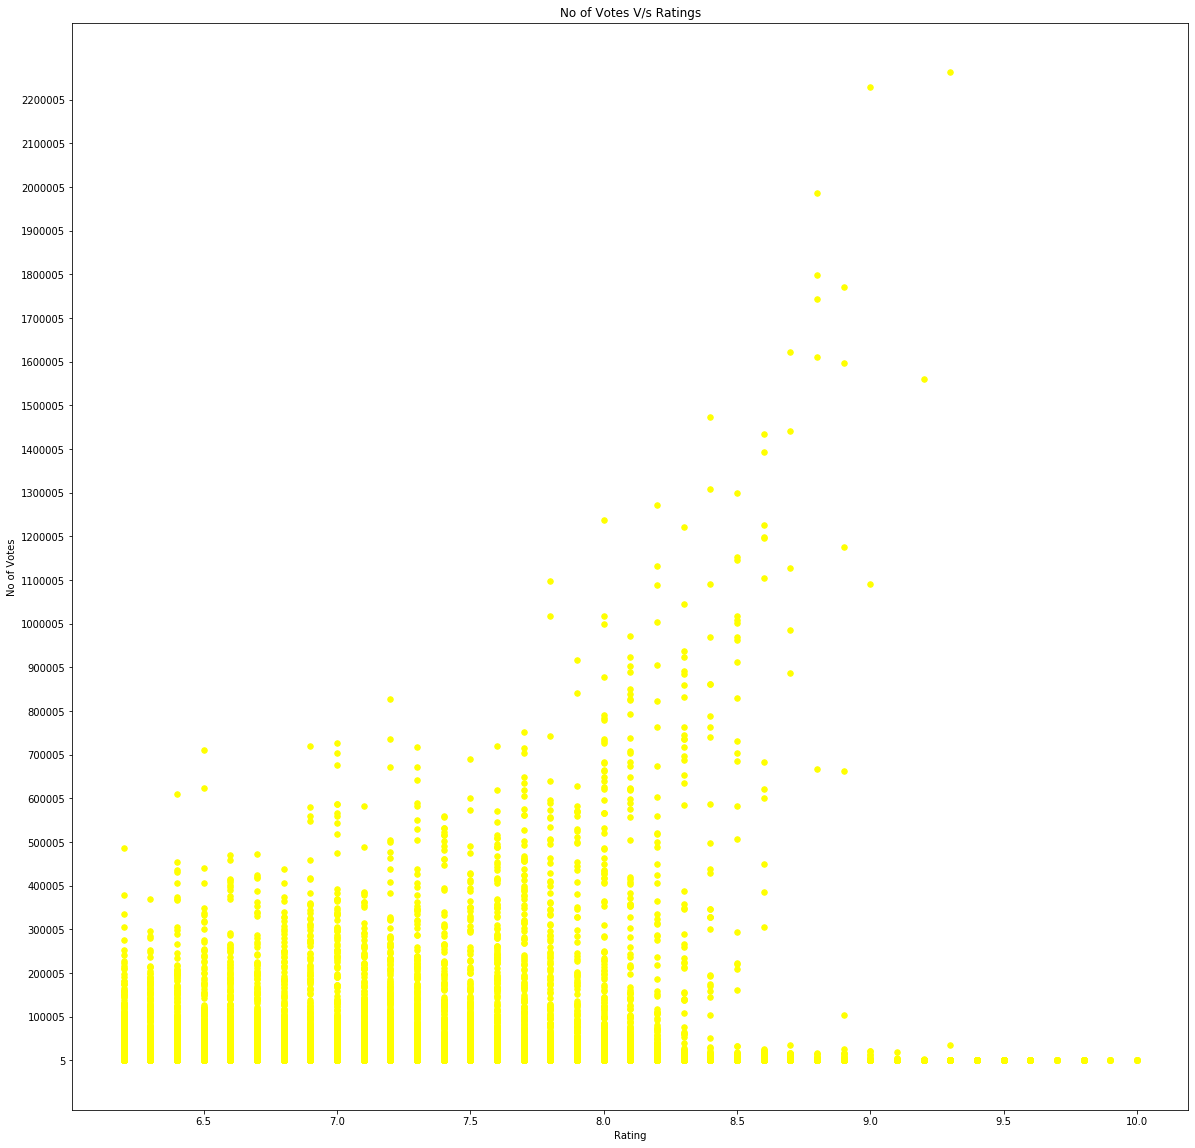

In [8]:
#Plotting scatter plot b/w No of votes and average Rating
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
plt.scatter(movie['averageRating'],movie['numVotes'],marker='o',color='yellow',s=30)
plt.yticks(np.arange(np.min(movie['numVotes']),np.max(movie['numVotes']),100000))
plt.xlabel('Rating')
plt.ylabel('No of Votes')
plt.title('No of Votes V/s Ratings')

In [9]:
import seaborn as sns

Text(0.5, 1.0, 'No of Movies Released by year')

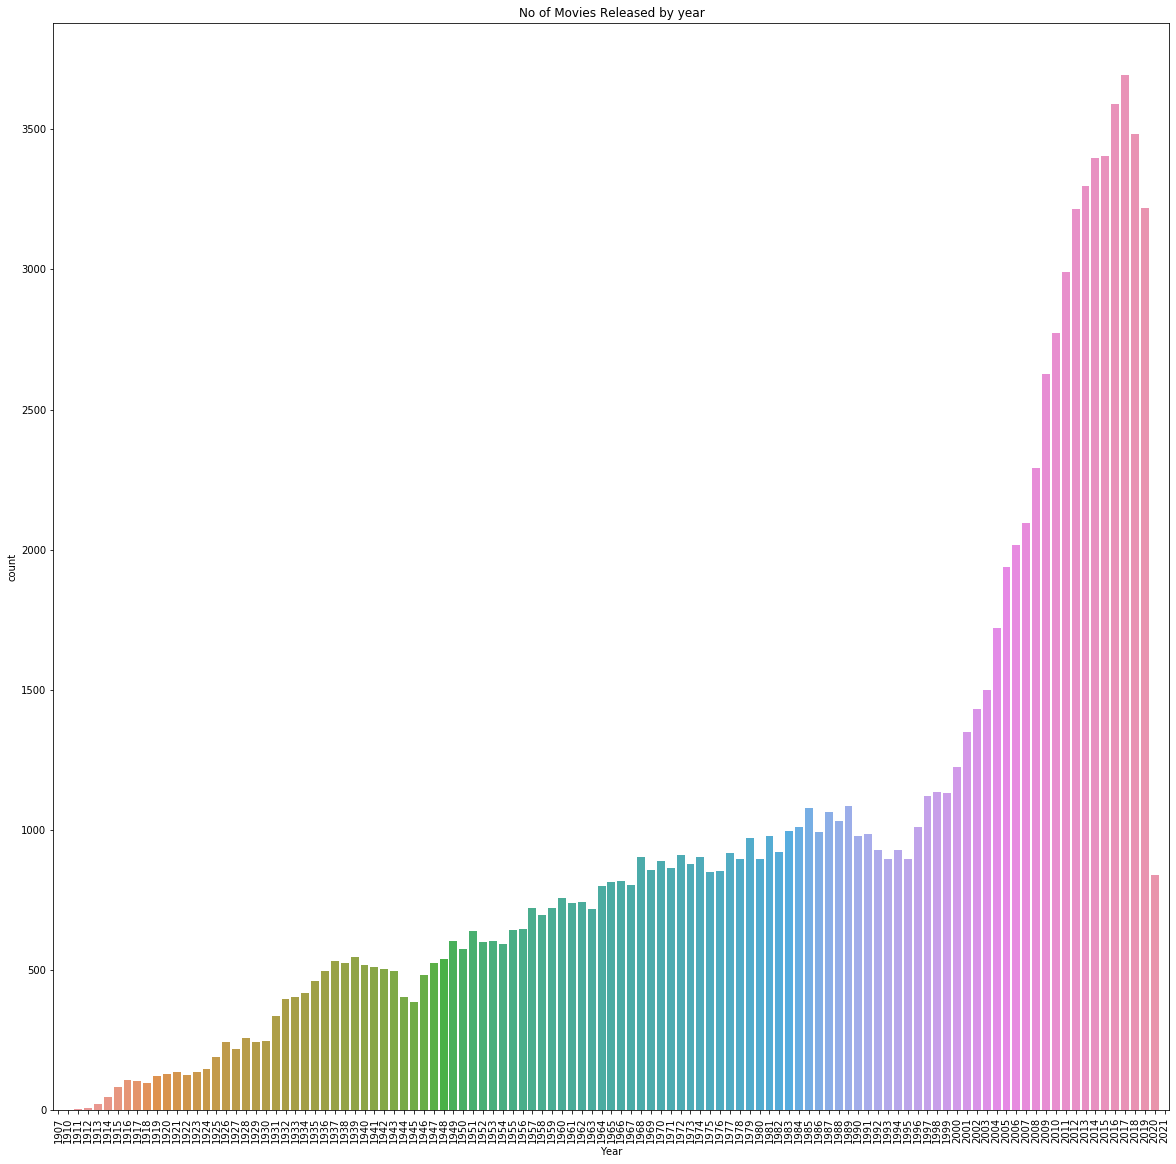

In [10]:
#Plotting countplot for visualising TV Shows released by year
plt.figure(figsize=(20,20))
chart=sns.countplot(x='Year',data=movie)
plt.xticks(rotation=90)
plt.title("No of Movies Released by year")

In [11]:
np.average(movie['numVotes'])

6333.053789503123

In [12]:
#Dropping numVotes which are less than average of numVotes so that only movies with good amount of votes are retained
movie.drop(movie[movie['numVotes']<np.average(movie['numVotes'])].index,inplace=True)

In [13]:
movie.sort_values(by=['averageRating'],ascending=False,inplace=True)

In [14]:
movie.index

Int64Index([ 30213,  45755,  19221,  96405,  60138,  20104,  23829, 103539,
             45756,  45904,
            ...
             28321,  63742,  71377,  63717,  60296,  70220,  70886, 103943,
             44717,  99749],
           dtype='int64', length=7812)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
#creating a count matrix
cv = CountVectorizer()
count_matrix_movie= cv.fit_transform(movie["Combined_Features"])

In [17]:
#generating the cosine similarity matrix
cosine_sim_movie = cosine_similarity(count_matrix_movie)

In [18]:
movie.reset_index(inplace=True)

In [19]:
movie.drop(columns=['index'],inplace=True)

In [20]:
movie=pd.DataFrame(movie,np.arange(len(movie)))

In [21]:
movie

,tconst,titleType,originalTitle,Year,runtimeMinutes,genres,averageRating,numVotes,directors,Actors,Combined_Features
0,tt0111161,movie,The Shawshank Redemption,1994,142.0,Drama,9.3,2263528,nm0001104,"nm0000209,nm0000151,nm0348409,nm0006669",Drama nm0001104 nm0000209 nm0000151 nm0348409 ...
1,tt0252487,movie,Hababam Sinifi,1975,87.0,"Comedy,Drama",9.3,36104,nm0251027,"nm0839017,nm0654805,nm0015145,nm0015081",Comedy Drama nm0251027 nm0839017 nm0654805 nm0...
2,tt0068646,movie,The Godfather,1972,175.0,"Crime,Drama",9.2,1561603,nm0000338,"nm0000008,nm0000199,nm0001001,nm0000473",Crime Drama nm0000338 nm0000008 nm0000199 nm00...
3,tt5354160,movie,Aynabaji,2016,147.0,"Crime,Mystery,Thriller",9.1,19692,nm2755490,"nm4413266,nm7861812,nm5040382,nm7194185",Crime Mystery Thriller nm2755490 nm4413266 nm7...
4,tt0468569,movie,The Dark Knight,2008,152.0,"Action,Crime,Drama",9.0,2228189,nm0634240,"nm0000288,nm0005132,nm0001173,nm0000323",Action Crime Drama nm0634240 nm0000288 nm00051...
...,...,...,...,...,...,...,...,...,...,...,...
7807,tt1320239,movie,Burke and Hare,2010,91.0,"Comedy,Crime,History",6.2,19083,nm0000484,"nm0047155,nm0929489,nm0806968,nm0000347",Comedy Crime History nm0000484 nm0047155 nm092...
7808,tt1356864,movie,I'm Still Here,2010,108.0,"Comedy,Drama,Music",6.2,20447,nm0000729,"nm0001618,nm0486018,nm3617391",Comedy Drama Music nm0000729 nm0001618 nm04860...
7809,tt7946422,movie,Prospect,2018,100.0,"Drama,Sci-Fi,Thriller",6.2,16937,"nm4938950,nm4777635","nm7393303,nm0243231,nm0050959,nm9291270",Drama Sci-Fi Thriller nm4938950 nm4777635 nm73...
7810,tt0242527,movie,The Hole,2001,102.0,"Drama,Mystery,Thriller",6.2,43525,nm0358327,"nm0000301,nm0004993,nm0110689,nm0289114",Drama Mystery Thriller nm0358327 nm0000301 nm0...


In [22]:
#Funtions for accessing movie from index and vice-versa
def get_title_from_index_movie(index):
    return movie[movie.index == index]["originalTitle"].values[0]
def get_index_from_title_movie(title):
    return movie[movie.originalTitle == title]["index"].values[0]

In [23]:
movie.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7802, 7803, 7804, 7805, 7806, 7807, 7808, 7809, 7810, 7811],
           dtype='int64', length=7812)

In [24]:
movie['index']=np.arange(len(movie))

In [25]:
movie

,tconst,titleType,originalTitle,Year,runtimeMinutes,genres,averageRating,numVotes,directors,Actors,Combined_Features,index
0,tt0111161,movie,The Shawshank Redemption,1994,142.0,Drama,9.3,2263528,nm0001104,"nm0000209,nm0000151,nm0348409,nm0006669",Drama nm0001104 nm0000209 nm0000151 nm0348409 ...,0
1,tt0252487,movie,Hababam Sinifi,1975,87.0,"Comedy,Drama",9.3,36104,nm0251027,"nm0839017,nm0654805,nm0015145,nm0015081",Comedy Drama nm0251027 nm0839017 nm0654805 nm0...,1
2,tt0068646,movie,The Godfather,1972,175.0,"Crime,Drama",9.2,1561603,nm0000338,"nm0000008,nm0000199,nm0001001,nm0000473",Crime Drama nm0000338 nm0000008 nm0000199 nm00...,2
3,tt5354160,movie,Aynabaji,2016,147.0,"Crime,Mystery,Thriller",9.1,19692,nm2755490,"nm4413266,nm7861812,nm5040382,nm7194185",Crime Mystery Thriller nm2755490 nm4413266 nm7...,3
4,tt0468569,movie,The Dark Knight,2008,152.0,"Action,Crime,Drama",9.0,2228189,nm0634240,"nm0000288,nm0005132,nm0001173,nm0000323",Action Crime Drama nm0634240 nm0000288 nm00051...,4
...,...,...,...,...,...,...,...,...,...,...,...,...
7807,tt1320239,movie,Burke and Hare,2010,91.0,"Comedy,Crime,History",6.2,19083,nm0000484,"nm0047155,nm0929489,nm0806968,nm0000347",Comedy Crime History nm0000484 nm0047155 nm092...,7807
7808,tt1356864,movie,I'm Still Here,2010,108.0,"Comedy,Drama,Music",6.2,20447,nm0000729,"nm0001618,nm0486018,nm3617391",Comedy Drama Music nm0000729 nm0001618 nm04860...,7808
7809,tt7946422,movie,Prospect,2018,100.0,"Drama,Sci-Fi,Thriller",6.2,16937,"nm4938950,nm4777635","nm7393303,nm0243231,nm0050959,nm9291270",Drama Sci-Fi Thriller nm4938950 nm4777635 nm73...,7809
7810,tt0242527,movie,The Hole,2001,102.0,"Drama,Mystery,Thriller",6.2,43525,nm0358327,"nm0000301,nm0004993,nm0110689,nm0289114",Drama Mystery Thriller nm0358327 nm0000301 nm0...,7810


In [26]:
#Getting a Movie user likes, in order to recommend other movies by the help of cosine-similarity matrix
#Note:The Movie recommended to the user will be based on genre,actors and directors.
movie_user_likes = "The Wolverine"
movie_index = get_index_from_title_movie(movie_user_likes)
similar_movies = list(enumerate(cosine_sim_movie[movie_index]))

In [27]:
#Obtaining 15 Movies similar to the show provided by the User
sorted_similar_movie = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

i=0
print("Top 10 Similar Movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movie:
    print(get_title_from_index_movie(element[0]))
    i=i+1
    if i>15:
        break

Top 10 Similar Movies to The Wolverine are:

Logan
X-Men: Days of Future Past
X-Men
X-Men: The Last Stand
X-Men Origins: Wolverine
Inception
Aliens
Mad Max: Fury Road
Jurassic Park
The Avengers
Star Wars: Episode VII - The Force Awakens
Star Trek
Iron Man
Edge of Tomorrow
Predator
Rogue One
